# NumTopics: RTLWiki

In [21]:
import gc
import pickle
import time

from topicnet.cooking_machine.dataset import Dataset
from topicnet.cooking_machine.models import TopicModel
from topicnet.cooking_machine.model_constructor import init_simple_default_model

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys

sys.path.insert(0, '..')

from run_search import (
    _optimize_scores,
)

from topnum.data.vowpal_wabbit_text_collection import VowpalWabbitTextCollection
from topnum.scores import (
    PerplexityScore,
    EntropyScore,
    DiversityScore
)
from topnum.search_methods.optimize_scores_method import OptimizeScoresMethod

In [4]:
from topnum.model_constructor import init_bcg_sparse_model, init_decorrelated_PLSA, init_LDA, init_PLSA


## Data

In [5]:
PATH = '/home/vbulatov/Projects/tmp_notebooks/MKB10.csv'
BATCHES = './MKB_batches'

dataset = Dataset(PATH, batch_vectorizer_path=BATCHES)
dataset.get_possible_modalities()

{'@letter', '@ngram', '@text'}

In [6]:
modalities = {
    "@text": 1.0,
}

In [7]:
vw_file_path = "MKB_vw.txt"

dataset.write_vw(vw_file_path)

In [8]:
# TODO: instead of modalities let's use predefined model families
# TODO: output_file_path

## Experiments

In [9]:
main_modality_name = next(iter(modalities.keys()))

In [10]:

main_modality_name, modalities = main_modality_name, modalities

modality_names = list(modalities.keys())

# vw_file_path = args.vw_file_path

output_file_path = "output.json"

min_num_topics = 5
max_num_topics = 30

num_topics_interval = 5


#num_topics_interval = 1
num_fit_iterations = 10
num_restarts = 1

In [11]:

scores = [
    EntropyScore('res', threshold_factor=1, class_ids=modality_names),
    EntropyScore('res2', threshold_factor=2, class_ids=modality_names),
    EntropyScore('res3', threshold_factor=3, class_ids=modality_names),

    DiversityScore('ds_l2'),
    DiversityScore('ds_cosine', metric="cosine"),
    DiversityScore('ds_js', metric="jensenshannon"),
    DiversityScore('ds_h', metric="hellinger"),
]

In [12]:
text_collection = VowpalWabbitTextCollection(
    vw_file_path,
    main_modality=main_modality_name,
    modalities=modalities
)

optimizer = OptimizeScoresMethod(
    model_family="PLSA",
    scores=scores,
    min_num_topics=min_num_topics,
    max_num_topics=max_num_topics,
    num_topics_interval=num_topics_interval,
    num_fit_iterations=num_fit_iterations,
    num_restarts=num_restarts,
    experiment_name="__TEST3__"
)

In [32]:
t_start

1583173833.7538145

In [13]:
t_start = time.time()

optimizer.search_for_optimum(text_collection)

/home/vbulatov/Projects/topicnet/cooking_machine/dataset.py:364: UserWarning: Attempted to use batches for different dataset.Overwriting batches in _dataset_prdpf8zp/dataset_batches
  warnings.warn(W_DIFF_BATCHES_1 + W_DIFF_BATCHES_2.format(batch_vectorizer_path))
100%|██████████| 1/1 [31:58<00:00, 1918.50s/it]
/home/vbulatov/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1018: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


! ls 'num_topics_experiments/__TEST2___-1/##20h14m04s_02d03m2020y###/model'

tm = TopicModel.load('num_topics_experiments/__TEST2___-1/##20h14m04s_02d03m2020y###')
tm2 = TopicModel.load('num_topics_experiments/__TEST2___-1/##19h55m00s_02d03m2020y###')


import pickle

with open('num_topics_experiments/__TEST2___-1/##20h14m04s_02d03m2020y###/ds_js.p', "rb") as f:
    js = pickle.load(f)

js.call(tm), js.call(tm2)

tm.scores["ds_js"]

tm2.scores["ds_js"]

import sys
del sys.modules['topnum.search_methods.optimize_scores_method']

from topnum.search_methods.optimize_scores_method import _summarize_models, restore_failed_experiment

result, detailed_result = restore_failed_experiment('num_topics_experiments', '__TEST2__')

detailed_result['ds_h']

In [14]:
t_end = time.time()

t_end - t_start

1925.3941342830658

In [15]:
detailed_result = optimizer._detailed_result

In [16]:
optimizer._detailed_result

{'PerplexityScore@all':                      5            6            7            8           9   \
 restart_id                                                                   
 seed=-1     2772.889893  2666.563232  2563.676514  2523.168701  2441.22168   
 
                      10           11           12           13           14  \
 restart_id                                                                    
 seed=-1     2371.936523  2305.332275  2259.731201  2206.596924  2161.208496   
 
                ...                21           22          23           24  \
 restart_id     ...                                                           
 seed=-1        ...       1955.002075  1939.811401  1906.21228  1884.029175   
 
                      25           26          27           28           29  \
 restart_id                                                                   
 seed=-1     1867.286987  1845.679443  1826.96521  1811.072754  1796.473755   
 
                  

In [17]:
optimizer._result['score_results'].keys()

dict_keys(['PerplexityScore@all', 'SparsityThetaScore', 'SparsityPhiScore@text', 'PerplexityScore@text', 'TopicKernel@text.average_coherence', 'TopicKernel@text.average_contrast', 'TopicKernel@text.average_purity', 'TopicKernel@text.average_size', 'TopicKernel@text.coherence', 'TopicKernel@text.contrast', 'TopicKernel@text.purity', 'TopicKernel@text.size', 'TopicKernel@text.tokens', 'res', 'res2', 'res3', 'ds_l2', 'ds_cosine', 'ds_js', 'ds_h'])

In [18]:
optimizer._result['score_results']['ds_h']

{'optimum': 5.0,
 'optimum_std': nan,
 'num_topics_values': [5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 'score_values': [0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356,
  0.6570112908203356],
 'score_values_std': [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan

The lower the entropy, the better is supposed to be the result model.
On X axis is the number of topics, on Y axis — the score.

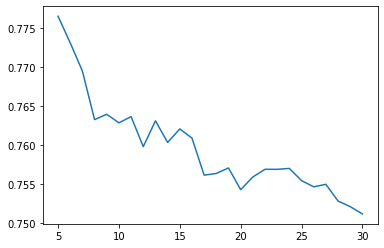

In [19]:
plt.plot(detailed_result['TopicKernel@text.average_contrast'].T)

plt.show()

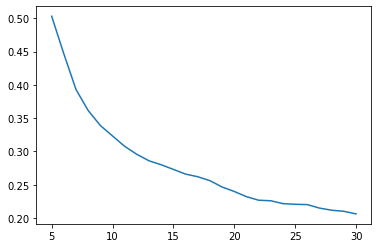

In [20]:
plt.plot(detailed_result['TopicKernel@text.average_purity'].T)

plt.show()

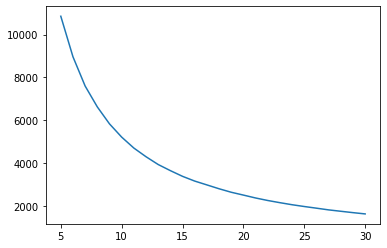

In [21]:
plt.plot(detailed_result['TopicKernel@text.average_size'].T)

plt.show()

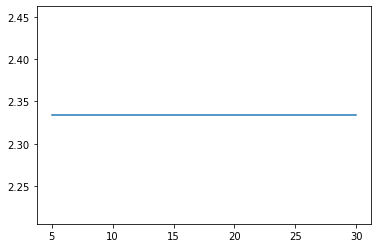

In [22]:
plt.plot(detailed_result['res'].T)

plt.show()

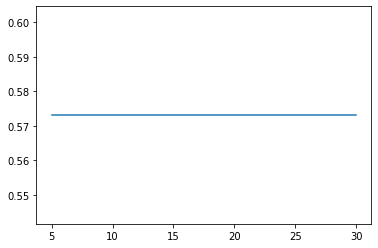

In [23]:
plt.plot(detailed_result['ds_js'].T)

plt.show()

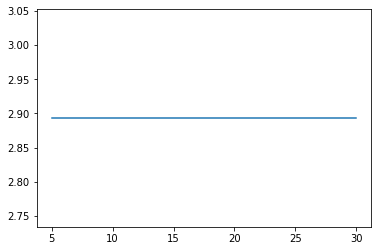

In [24]:
plt.plot(detailed_result['res2'].T.mean(axis=1))
plt.show()

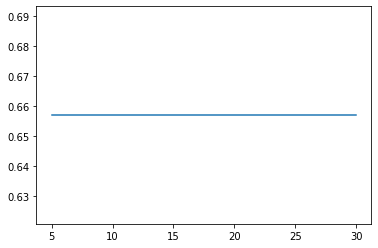

In [25]:
plt.plot(detailed_result['ds_h'].T)
plt.show()

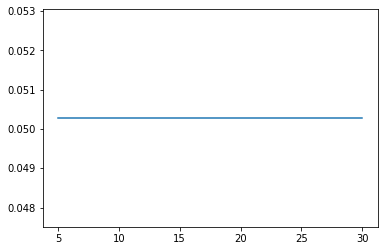

In [26]:
plt.plot(detailed_result['ds_l2'].T.mean(axis=1))
plt.show()

In [27]:
with open("detailed_result_rtl.p", "wb") as f:
    pickle.dump(detailed_result, f)

All models are saved and can be restored

In [29]:
tm = TopicModel.load(
    "./num_topics_experiments/e68cc1ff_experiment_-1/##13h32m50s_20d02m2020y###"
)

FileNotFoundError: [Errno 2] No such file or directory: './num_topics_experiments/e68cc1ff_experiment_-1/##13h32m50s_20d02m2020y###'

In [ ]:
df.sum().sum() / 

In [ ]:
df.mean().mean() * 25/24

In [ ]:
T = 25
2/(T * (T - 1)) * sum(condensed_distances)

In [ ]:
phi.shape